# Q1: K-Fold Cross Validation for Multiple Linear Regression (Least Square Error Fit) Load the dataset and Implement 5- fold cross validation for multiple linear regression (using least square error fit).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math 

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/assignment 4/USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05
...,...,...,...,...,...,...
4995,60567.94414,7.830362,6.137356,3.46,22837.36103,1.060194e+06
4996,78491.27543,6.999135,6.576763,4.02,25616.11549,1.482618e+06
4997,63390.68689,7.250591,4.805081,2.13,33266.14549,1.030730e+06
4998,68001.33124,5.534388,7.130144,5.44,42625.62016,1.198657e+06


In [ ]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
dtype: int64

#Q1: (i) Divide the dataset into input features (all columns except price) and output variable (price)

In [ ]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values.reshape(-1,1)
x.shape,y.shape

((5000, 5), (5000, 1))

#Q1:(ii) Scale the values of input features.

In [ ]:
def scale(x):
    me=np.mean(x,axis=0)
    st=np.std(x,axis=0)
    me=np.full((x.shape[0],x.shape[1]),me)
    st=np.full((x.shape[0],x.shape[1]),st)

    print(me.shape,st.shape)
    x_sc=np.subtract(x,me)/st
    return x_sc

In [ ]:
x_sc=scale(x)
x_sc

(5000, 5) (5000, 5)


array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462915, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc = sc.fit_transform(x)
x_sc

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462915, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
x_sc = scaler.fit_transform(x)
x_sc

array([[0.68682217, 0.44198584, 0.50150158, 0.46444444, 0.3299422 ],
       [0.68352073, 0.48853836, 0.46450137, 0.24222222, 0.57596801],
       [0.48373705, 0.46860901, 0.70135011, 0.69555556, 0.52858204],
       ...,
       [0.50713527, 0.67002636, 0.20853446, 0.02888889, 0.47651494],
       [0.55841872, 0.4203891 , 0.51757886, 0.76444444, 0.61128233],
       [0.53071451, 0.48699729, 0.47267788, 0.46      , 0.66708815]])

#Q1 (iii) Divide input and output features into five folds.

#Q1 (iv) Run five iterations, in each iteration consider one-fold as test set and remaining four sets as training set. Find the beta (𝛽) matrix, predicted values, and R2_score for each iteration using least square error fit.

In [ ]:
def linear_reg_lse(x,y):

    #y=np.reshape((-1,1))
    on=np.ones((x.shape[0],1))
    on=np.hstack((on,x))  
    inver=np.linalg.pinv(x.T.dot(x))
    return inver.dot(x.T).dot(y)

def predict(x_test,b):
    return np.dot(x_test,b)


In [ ]:
import random
from sklearn import metrics
k_fold=5
split=int(x.shape[0]*1/k_fold)
print(split)

x_comb=np.concatenate((x_sc,y.reshape(-1,1)),axis=1)

# shuffeling
random.seed(0)
np.random.shuffle(x_comb)

beta=[]
acc=[]
for i in range(0,x_comb.shape[0],split):

    start=i
    end=i+split



    #print(start,end)
    x_train1=x_comb[0:start,:-1]
    y_train1=x_comb[0:start,-1].reshape(-1,1)

    x_train2=x_comb[end:x.shape[0],:-1]
    y_train2=x_comb[end:x.shape[0],-1].reshape(-1,1)

    #print('dw',y_train1.shape,y_train2.shape)
    
    x_train=np.vstack((x_train1,x_train2))
    y_train=np.vstack((y_train1,y_train2))

    x_test=x_comb[start:end,:-1]
    y_test=x_comb[start:end,-1].reshape(-1,1)

    #print(x_test.shape,y_test.shape)
    #print(x_train.shape,y_train.shape)
    
    be=linear_reg_lse(x_train,y_train)
    y_pred=predict(x_test,be)
    print(be)
    print(metrics.r2_score(y_test,y_pred))
    beta.append(be)
    acc.append(metrics.r2_score(y_test,y_pred))

1000
[[1022285.04327866]
 [ 603917.53506172]
 [ 266827.31135552]
 [  27002.99998715]
 [ 464368.88858293]]
0.6612519151124796
[[1025866.73379476]
 [ 588406.49217105]
 [ 261901.81326579]
 [  33900.61882772]
 [ 468623.30520253]]
0.6721655714421312
[[1028573.5746292 ]
 [ 595604.09158278]
 [ 256750.57935356]
 [  32105.63157478]
 [ 471333.76902544]]
0.6645249696930349
[[1026788.25905426]
 [ 620887.65092123]
 [ 246018.58884719]
 [  18152.26987744]
 [ 465058.87470581]]
0.6554415302219007
[[1018378.86524158]
 [ 601867.30605759]
 [ 246692.48876401]
 [  25012.92143576]
 [ 487179.5480704 ]]
0.666544704978293


#Q1 (v) the best value of (𝛽) matrix (for which R2_score is maximum),

In [ ]:
best_acc=np.argmax(acc)
best_beta=beta[best_acc]
print('R2_score',acc[best_acc]*100)
best_beta

R2_score 67.21655714421311


array([[1025866.73379476],
       [ 588406.49217105],
       [ 261901.81326579],
       [  33900.61882772],
       [ 468623.30520253]])

# Q2: Concept of Validation set for Multiple Linear Regression (Gradient Descent Optimization)

In [ ]:
import random
from sklearn import metrics

def predict(x,beta):
    return np.dot(x,beta)
def regression_fit(x,y,learning_rate=0.01,max_iters=500):
    m,n=x.shape
    #print(m,n)
    beta=np.zeros(n)
    loss=[]
    for i in range(max_iters):
        y_=predict(x,beta)
        loss.append(np.sum((y_-y)**2)/m)
        grad=np.dot(x.T,(y_-y))
        grad=grad/m

        beta=beta-learning_rate*grad
    y_=predict(x,beta)
    r_score=metrics.r2_score(y_,y)
    return beta,loss,r_score

In [ ]:
x_comb=np.concatenate((x_sc,y.reshape(-1,1)),axis=1)
random.seed(0)
np.random.shuffle(x_comb)
x_comb.shape

(5000, 6)

In [ ]:
x=x_comb[:,:-1]
y=x_comb[:,-1]
print(x.shape)
print(y.shape)

(5000, 5)
(5000,)


In [ ]:
train_val_split=int(0.56*x_comb.shape[0])
val_test_split=int(0.70*x_comb.shape[0])
print(train_val_split,val_test_split)
x_train=x_comb[:train_val_split,:]
x_validate=x_comb[train_val_split:val_test_split,:]
x_test=x_comb[val_test_split:,:]
print(x_train.shape)
print(x_validate.shape)
print(x_test.shape)

2800 3500
(2800, 6)
(700, 6)
(1500, 6)


(2800, 5) (2800,)
[1099345.51351768  651638.33291331  397512.90643934  -20760.33675498
  535852.85338844]
0.3393375870944978


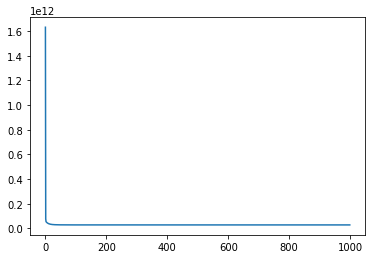

In [ ]:
x_tr=x_train[:,:-1]
y_tr=x_train[:,-1]

scaler = MinMaxScaler() 
x_tr = scaler.fit_transform(x_tr)

print(x_tr.shape,y_tr.shape)
theta,err,acc=regression_fit(x_tr,y_tr,learning_rate=1,max_iters=1000)
print(theta)
print(acc)
plt.plot(err)

-8.98563675095772
[367649.03163525 378716.15987871 336772.74285095 322318.93755261
 377226.97768592]
0.010072702010891055
[684941.6100167  625592.8702005  469894.38174968 267834.46027465
 605677.01323729]
0.32185433307942957
[1056834.14895351  664130.8209045   403754.72165593  -21061.79550622
  557921.47456154]
0.3393375870944978
[1099345.51351768  651638.33291331  397512.90643934  -20760.33675498
  535852.85338844]


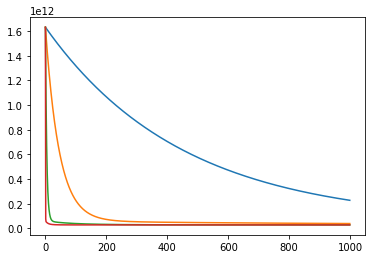

In [ ]:
acs=[]
thetas=[]
for lr in [0.001,0.01,0.1,1]:
    x_tr=x_train[:,:-1]
    y_train=x_train[:,-1]

    scaler = MinMaxScaler() 
    x_tr = scaler.fit_transform(x_tr)

    #print(x_tr.shape,y_train.shape)
    theta,err,a=regression_fit(x_tr,y_train,learning_rate=lr,max_iters=1000)
    
    thetas.append(theta)
    acs.append(a)
    print(a)
    print(theta)

    plt.plot(err)
    y_pred_test=predict(x_test[:,:-1],theta)
    #acc=metrics.r2_score(y_pred,y_test[:,-1])
    #print(acc)

In [ ]:
id=np.argmax(acs)
print("Accuracy",acs[id])
print("Best Beta",thetas[id])

Accuracy 0.3393375870944978
Best Beta [1099345.51351768  651638.33291331  397512.90643934  -20760.33675498
  535852.85338844]


# Q3: Pre-processing and Multiple Linear Regression

#Q3: 1. Load the dataset with following column names ["symboling", "normalized_losses","make", "fuel_type", "aspiration","num_doors", "body_style", "drive_wheels", "engine_location", "wheel_base", "length", "width", "height", "curb_weight","engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke","compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]and replace all ? values with NaN



In [ ]:
col=["symboling", "normalized_losses",
"make", "fuel_type", "aspiration","num_doors", "body_style", "drive_wheels",
"engine_location", "wheel_base", "length", "width", "height", "curb_weight",
"engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke",
"compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/assignment 4/imports-85.csv',header=None)#,columns=col)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
df.columns=col
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
df=df.replace('?',np.nan)
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


#Q3: 2. Replace all NaN values with central tendency imputation. Drop the rows with NaN values in price column


In [ ]:
df = df[df['price'].notna()]
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


#Q3: 3. There are 10 columns in the dataset with non-numeric values. Convert these values to numeric values using following scheme:


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  164 non-null    object 
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_doors          199 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_cylinders      201 non-null    object 
 16  engine_size        201 non

In [ ]:
print(col)
convert_dict = {"normalized_losses":float,"bore":float, "stroke":float,"horsepower":float, "peak_rpm":float,"price":float}
  
df = df.astype(convert_dict)
df.info()

['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'num_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_doors          199 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_bas

#(i) For “num_doors” and “num_cylinders”: convert words (number names) to figures for e.g., two to 2


In [ ]:
# num_doors
print(df['num_doors'].unique())
df['num_doors'].replace({'two':2, 'four':4},inplace=True)
df['num_doors'].unique()

['two' 'four' nan]


array([ 2.,  4., nan])

In [ ]:
#num_cylinders
c='num_cylinders'
print(df[c].unique())
df[c].replace({'four':4 ,'six':6 ,'five':5 ,'three':3, 'twelve':12 ,'two':2 ,'eight':8},inplace=True)
df[c].unique()

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


array([ 4,  6,  5,  3, 12,  2,  8])

In [ ]:
df=df.fillna(df.median())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_doors          201 non-null    float64
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_cylinders      201 non-null    int64  
 16  engine_size        201 non

#Q3: 3(ii) For "body_style", "drive_wheels": use dummy encoding scheme


In [ ]:
c='body_style'
print(df[c].unique())
c='drive_wheels'
print(df[c].unique())
df = pd.get_dummies(df, columns = ["body_style", "drive_wheels"], prefix=["body", "drive"])
df

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd
0,3,115.0,alfa-romero,gas,std,2.0,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,1,0,0,0,0,0,0,1
1,3,115.0,alfa-romero,gas,std,2.0,front,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,1,0,0,0,0,0,0,1
2,1,115.0,alfa-romero,gas,std,2.0,front,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0,0,1,0,0,0,0,1
3,2,164.0,audi,gas,std,4.0,front,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0,0,0,1,0,0,1,0
4,2,164.0,audi,gas,std,4.0,front,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,4.0,front,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,0,0,0,1,0,0,0,1
201,-1,95.0,volvo,gas,turbo,4.0,front,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,0,0,0,1,0,0,0,1
202,-1,95.0,volvo,gas,std,4.0,front,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,0,0,0,1,0,0,0,1
203,-1,95.0,volvo,diesel,turbo,4.0,front,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,0,0,0,1,0,0,0,1


#Q3: 3(iii) For “make”, “aspiration”, “engine_location”,fuel_type: use label encoding scheme


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['make']=le.fit_transform(df['make'])
df['aspiration']=le.fit_transform(df['aspiration'])
df['engine_location']=le.fit_transform(df['engine_location'])
df['fuel_type']=le.fit_transform(df['fuel_type'])
#'aspiration', 'engine_location','fuel_type'
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd
0,3,115.0,0,1,0,2.0,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,1,0,0,0,0,0,0,1
1,3,115.0,0,1,0,2.0,0,88.6,168.8,64.1,48.8,2548,dohc,4,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,1,0,0,0,0,0,0,1
2,1,115.0,0,1,0,2.0,0,94.5,171.2,65.5,52.4,2823,ohcv,6,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0,0,1,0,0,0,0,1
3,2,164.0,1,1,0,4.0,0,99.8,176.6,66.2,54.3,2337,ohc,4,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0,0,0,1,0,0,1,0
4,2,164.0,1,1,0,4.0,0,99.4,176.6,66.4,54.3,2824,ohc,5,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,1,0,4.0,0,109.1,188.8,68.9,55.5,2952,ohc,4,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,0,0,0,1,0,0,0,1
201,-1,95.0,21,1,1,4.0,0,109.1,188.8,68.8,55.5,3049,ohc,4,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,0,0,0,1,0,0,0,1
202,-1,95.0,21,1,0,4.0,0,109.1,188.8,68.9,55.5,3012,ohcv,6,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,0,0,0,1,0,0,0,1
203,-1,95.0,21,0,1,4.0,0,109.1,188.8,68.9,55.5,3217,ohc,6,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,0,0,0,1,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    float64
 2   make               201 non-null    int64  
 3   fuel_type          201 non-null    int64  
 4   aspiration         201 non-null    int64  
 5   num_doors          201 non-null    float64
 6   engine_location    201 non-null    int64  
 7   wheel_base         201 non-null    float64
 8   length             201 non-null    float64
 9   width              201 non-null    float64
 10  height             201 non-null    float64
 11  curb_weight        201 non-null    int64  
 12  engine_type        201 non-null    object 
 13  num_cylinders      201 non-null    int64  
 14  engine_size        201 non-null    int64  
 15  fuel_system        201 non-null    object 
 16  bore               201 non

In [ ]:
print(df['fuel_system'].unique())
print(df['engine_type'].unique())

['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']


#Q3: 3.(iv) For fuel_system: replace values containing string pfi to 1 else all values to 0.


In [ ]:
fuel_sys=df['fuel_system'].values
fuel_sys
fuel=np.zeros(df.shape[0])
for i in range(df.shape[0]):
    if 'pfi' in fuel_sys[i]:
        fuel[i]=1
fuel

#df['fuel_system'][9]
#for i in range(df.shape[0]):
#    print(i,df['fuel_system',i])

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.])

#Q3: 3.(v) For engine_type: replace values containing string ohc to 1 else all values to 0.


In [ ]:
engine_type=df['engine_type'].values

engine=np.zeros(df.shape[0])
for i in range(df.shape[0]):
    if 'ohc' in engine_type[i]:
        engine[i]=1
engine

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
df['fuel_system']=fuel
df['engine_type']=engine
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,body_convertible,body_hardtop,body_hatchback,body_sedan,body_wagon,drive_4wd,drive_fwd,drive_rwd
0,3,115.0,0,1,0,2.0,0,88.6,168.8,64.1,48.8,2548,1.0,4,130,1.0,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,1,0,0,0,0,0,0,1
1,3,115.0,0,1,0,2.0,0,88.6,168.8,64.1,48.8,2548,1.0,4,130,1.0,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,1,0,0,0,0,0,0,1
2,1,115.0,0,1,0,2.0,0,94.5,171.2,65.5,52.4,2823,1.0,6,152,1.0,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0,0,1,0,0,0,0,1
3,2,164.0,1,1,0,4.0,0,99.8,176.6,66.2,54.3,2337,1.0,4,109,1.0,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0,0,0,1,0,0,1,0
4,2,164.0,1,1,0,4.0,0,99.4,176.6,66.4,54.3,2824,1.0,5,136,1.0,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,1,0,4.0,0,109.1,188.8,68.9,55.5,2952,1.0,4,141,1.0,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,0,0,0,1,0,0,0,1
201,-1,95.0,21,1,1,4.0,0,109.1,188.8,68.8,55.5,3049,1.0,4,141,1.0,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,0,0,0,1,0,0,0,1
202,-1,95.0,21,1,0,4.0,0,109.1,188.8,68.9,55.5,3012,1.0,6,173,1.0,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,0,0,0,1,0,0,0,1
203,-1,95.0,21,0,1,4.0,0,109.1,188.8,68.9,55.5,3217,1.0,6,145,0.0,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,0,0,0,1,0,0,0,1


#Q3 4. Divide the dataset into input features (all columns except price) and output variable (price). Scale all input features.


In [ ]:
df.columns
x_col=['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_doors', 'engine_location', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine_type', 'num_cylinders', 'engine_size',
       'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'body_convertible',
       'body_hardtop', 'body_hatchback', 'body_sedan', 'body_wagon',
       'drive_4wd', 'drive_fwd', 'drive_rwd']
x=df[x_col].values
y=df['price'].values
x.shape,y.shape

((201, 31), (201,))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_sc = sc.fit_transform(x)
x_sc

array([[ 1.72504964, -0.17830627, -1.97171697, ..., -0.20359464,
        -1.19234506,  1.29614814],
       [ 1.72504964, -0.17830627, -1.97171697, ..., -0.20359464,
        -1.19234506,  1.29614814],
       [ 0.1271926 , -0.17830627, -1.97171697, ..., -0.20359464,
        -1.19234506,  1.29614814],
       ...,
       [-1.47066444, -0.80268884,  1.39503761, ..., -0.20359464,
        -1.19234506,  1.29614814],
       [-1.47066444, -0.80268884,  1.39503761, ..., -0.20359464,
        -1.19234506,  1.29614814],
       [-1.47066444, -0.80268884,  1.39503761, ..., -0.20359464,
        -1.19234506,  1.29614814]])

#Q3: 5. Train a linear regressor on 70% of data (using inbuilt linear regression function of Python) and test its performance on remaining 30% of data.


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sc, y, test_size=0.33, random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(134, 31) (134,)
(67, 31) (67,)


In [ ]:
y_train1=y_train.reshape(-1,1)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train1)
lr.score(x_test,y_test.reshape(-1,1))

0.8769774767691765

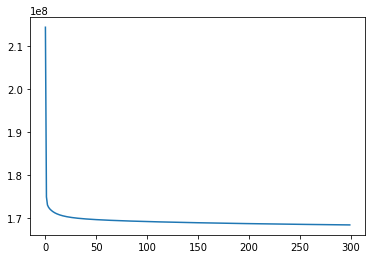

In [ ]:
theta,loss=gradient_descent(x_train,y_train)
plt.plot(loss)

In [ ]:
y_pred=hypothesis(x_test,theta)
print(metrics.r2_score(y_test,y_pred))

-1.565016767013025


#Q3: 6. Reduce the dimensionality of the feature set using inbuilt PCA decomposition and then again train a linear regressor on 70% of reduced data (using inbuilt linear regression function of Python). Does it lead to any performance improvement on test set?

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
x_pca = pca.fit_transform(x)
pca.explained_variance_ratio_

array([6.41861236e-01, 3.54150027e-01, 1.93419013e-03, 1.47138250e-03,
       3.60213689e-04, 7.95513517e-05, 6.46195348e-05, 4.08454883e-05,
       1.32206728e-05, 1.11887362e-05])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
pca.explained_variance_ratio_

array([0.64186124, 0.35415003])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.33, random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(134, 2) (134,)
(67, 2) (67,)


In [ ]:
y_train1=y_train.reshape(-1,1)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train1)
lr.score(x_test,y_test.reshape(-1,1))

0.7083958257332175